In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from sklearn import svm
### 手写字符数据下载
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 
print(type(X_train)) 

plt.imshow(X_train[0], cmap="Greys") 
plt.show()

c:\Users\lll23\Anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\lll23\Anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


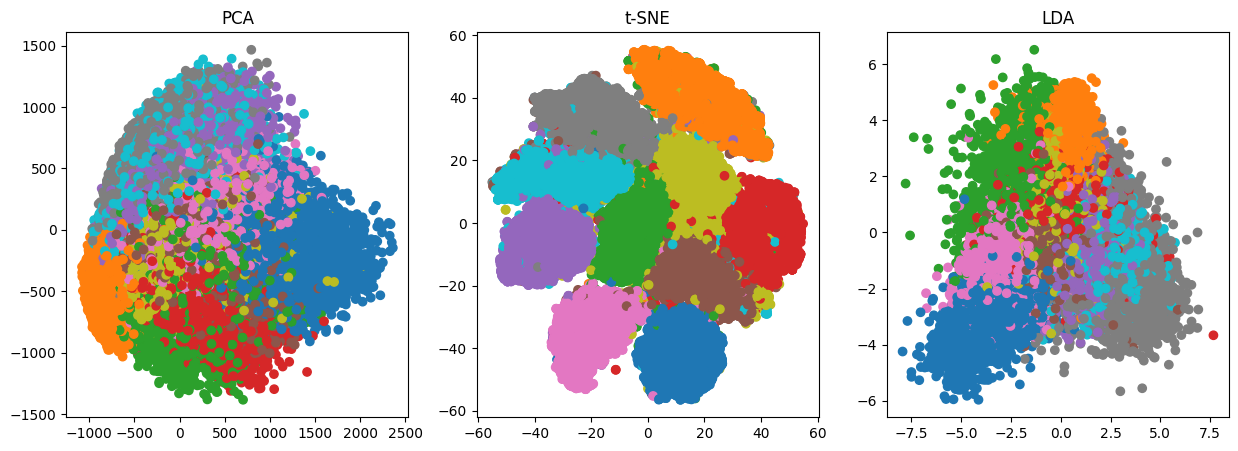

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 将数据展平成二维数组
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# 实例化三种降维算法
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

# 使用PCA进行降维
X_pca = pca.fit_transform(X_train_flattened)

# 使用t-SNE进行降维
X_tsne = tsne.fit_transform(X_train_flattened)

# 使用LDA进行降维
X_lda = lda.fit_transform(X_train_flattened, y_train)

# 可视化降维结果
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10')
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='tab10')
plt.title('t-SNE')

plt.subplot(1, 3, 3)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='tab10')
plt.title('LDA')

plt.show()


In [ ]:
# 将图像数据转换为浮点数并归一化到[0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 将图像数据展平为一维数组
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 创建SVM分类器
clf = svm.SVC(gamma=0.0009, C=10., kernel='rbf')
# 训练SVM模型
clf.fit(X_train, y_train)
pre_test = clf.predict(X_test)
#### 计算均方根误差
Loss = (y_test-pre_test)**2
print(Loss.mean())